In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C://Users//khushi//Desktop//py//codebasicspy//DeepLearningML//8_sgd_vs_gd//homeprices.csv")

In [3]:
df.sample(5)

,area,bedrooms,age,price
2,3200,3,18,610000
1,3000,4,15,565000
0,2600,3,20,550000
3,3600,3,30,595000
5,4100,6,8,810000


In [4]:
X = df.drop('price', axis = 'columns')
y = df.price

In [5]:
X.shape

(6, 3)

In [6]:
from sklearn import preprocessing 

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price', axis = 'columns'))
scaled_X

C:\Users\khushi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [7]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y.reshape(6,)

C:\Users\khushi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([0.        , 0.05769231, 0.23076923, 0.17307692, 0.80769231,
       1.        ])

In [8]:
#Randomly permute a sequence
np.random.permutation(6)

array([3, 2, 0, 5, 4, 1])

In [9]:
def mini_batch_gd(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    #in this case mini batch gd becomes the same as batch gd
    if batch_size > total_samples:
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):
        random_indices = np.random.permutation(total_samples)
        sample_x  = X[random_indices]
        sample_y = y_true[random_indices]
        
        for j in range(0, total_samples, batch_size):
            Xj = sample_x[j:j+batch_size]
            yj = sample_y[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
        
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
        
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
        
            cost = np.mean(np.square(yj - y_predicted)) #MSE
        
        if i %10 == 0 :
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
    
w_mbg, b_mbg, cost_mbg, cost_list_mbg, epoch_list_mbg = mini_batch_gd(
    scaled_X, 
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w_mbg, b_mbg, cost_mbg, cost_list_mbg, epoch_list_mbg

(array([0.64273437, 0.88284593, 0.58778682]),
 -0.5039139598498213,
 0.016676466837108366,
 [0.3558253797017857,
  1.0582691751778197,
  0.0006598497228877245,
  0.010400773892337595,
  0.24895273681602692,
  0.02501168211442154,
  0.022658114399892956,
  0.03332580981316596,
  0.036070339449144805,
  0.03707558604894674,
  0.018566468777077162,
  0.00030944651454080347],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110])

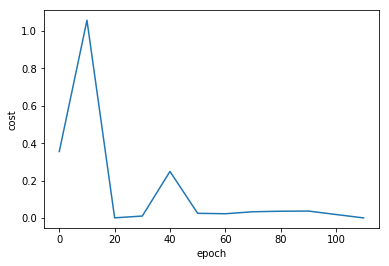

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_mbg, cost_list_mbg)

In [11]:
# def predict(area, bedroom, w, b):
#     scaled_X = sx.transform([[area, bedroom]])[0]
    
#     scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
#     return sy.inverse_transform([[scaled_price]])[0][0]

# predict(2000, 4, w_mbg, b_mbg)

In [12]:
def predict(area, bedroom, age, w, b):
    scaled_X = sx.transform([[area, bedroom, age]])[0]
    
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2000, 4, 21, w_mbg, b_mbg)

518956.7384961551

In [13]:
predict(4100, 6, 8, w_mbg, b_mbg)

815633.2493379992